In [7]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from pandas import DataFrame
import math
import matplotlib.pyplot as plt

# 读入数据所序列
row_data = pd.read_csv("F:/CourseData/数据挖掘/datamining20/trade_new.csv")
df1 = row_data[["vipno", "pluno", "amt"]]
df2 = row_data[["vipno", "pluno", "amt"]]
df3 = row_data[["vipno", "pluno", "amt"]]
df4 = row_data[["vipno", "pluno", "amt"]]

In [8]:
# keyong 6227002180901670266 6227002180921663895 781924 13325038116
# 把pluno列取为第一、二、三、四级商品编号
df1["pluno"] = (df1["pluno"]/1000000).astype(int)
df2["pluno"] = (df2["pluno"]/100000).astype(int)
df3["pluno"] = (df3["pluno"]/10000).astype(int)
df4["pluno"] = (df4["pluno"]/1000).astype(int)
print(df1)

               vipno  pluno     amt
0      2900003115009     22    5.06
1      2900001575201     34   27.90
2      1591040161114     11   33.90
3      1591016439575     27    8.00
4      1591015027858     11   39.00
5      2900000476042     15    5.90
6      1590140305107     27    8.00
7      2900000476042     15    5.90
8      1590142197076     27    8.00
9      2900001436410     15    4.90
10     1591016439575     27    8.00
11     1591016439575     27    8.00
12     1591015454210     32   10.00
13     2900001437165     10    3.90
14     1590140304506     27    8.00
15     1591013766650     10    3.90
16     1591014637324     15    5.90
17     1590151103907     15    4.90
18     1590151103907     15    4.90
19     2900000890688     10    3.90
20     1591020377344     32   15.90
21     2900000353848     10    3.90
22     1590142201162     10    3.90
23     1590140306678     11   39.00
24     2900002936940     14   16.90
25     2900000353848     10    3.90
26     2900000353848     10 

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be

**接下来为聚类数据做准备，先把所有的vip和plu列表整出来，然后这样就可以让一个用户占一行，然后列是每一个商品，也就是我们要进行聚类的维度**

In [9]:
df1 = df1.sort_values(by=["vipno"])
vipno_series = df1["vipno"].drop_duplicates()
vipno_series = vipno_series.reset_index(drop=True)
print(vipno_series)
df1 = df1.sort_values(by=["pluno"])
pluno_series1 = df1["pluno"].drop_duplicates()
pluno_series1 = pluno_series1.reset_index(drop=True)
print(pluno_series1)
df2 = df2.sort_values(by=["pluno"])
pluno_series2 = df2["pluno"].drop_duplicates()
pluno_series2 = pluno_series2.reset_index(drop=True)
print(pluno_series2)
df3 = df3.sort_values(by=["pluno"])
pluno_series3 = df3["pluno"].drop_duplicates()
pluno_series3 = pluno_series3.reset_index(drop=True)
print(pluno_series3)
df4 = df4.sort_values(by=["pluno"])
pluno_series4 = df4["pluno"].drop_duplicates()
pluno_series4 = pluno_series4.reset_index(drop=True)
print(pluno_series4)
# 分组，求和
group_data1 = df1.groupby(["vipno","pluno"])["amt"].sum()
print(group_data1)
group_data2 = df2.groupby(["vipno","pluno"])["amt"].sum()
print(group_data2)
group_data3 = df3.groupby(["vipno","pluno"])["amt"].sum()
print(group_data3)
group_data4 = df4.groupby(["vipno","pluno"])["amt"].sum()
print(group_data4)
#记录：用户486个，plu一级18个，plu二级94个，plu三级329个，plu四级979个

0                   781924
1              13325038116
2              13854627199
3              13864739266
4              15954611837
5              15954688237
6              15963883482
7              15963885355
8              18554652702
9              18654692914
10             18764569988
11           1590120464497
12           1590120718170
13           1590130640102
14           1590130817948
15           1590140304209
16           1590140304506
17           1590140305107
18           1590140306678
19           1590140307286
20           1590140307415
21           1590140307767
22           1590140307859
23           1590140308030
24           1590140308214
25           1590141216259
26           1590141414228
27           1590142128124
28           1590142129763
29           1590142148962
              ...         
456          2900002934915
457          2900002936520
458          2900002936940
459          2900002937428
460          2900002937503
461          2900002944402
4

**这里是进行jaccard距离计算的函数，因为最后传入是两个数组，我们要取交集，除以并集**

In [10]:
#记录：用户486个，plu一级18个，plu二级94个，plu三级329个，plu四级979个
def jaccard_dist(a, b):
    fenzi = 0
    fenmu = 0
    for i in range(0,18):
        fenzi += min(a[i],b[i])
        fenmu += max(a[i],b[i])
    sim1 = fenzi/fenmu
    fenzi = 0
    fenmu = 0
    for i in range(18,18+94):
        fenzi += min(a[i],b[i])
        fenmu += max(a[i],b[i])
    sim2 = fenzi/fenmu
    fenzi = 0
    fenmu = 0
    for i in range(18+94,18+94+329):
        fenzi += min(a[i],b[i])
        fenmu += max(a[i],b[i])
    sim3 = fenzi/fenmu
    fenzi = 0
    fenmu = 0
    for i in range(18+94+329,18+94+329+979):
        fenzi += min(a[i],b[i])
        fenmu += max(a[i],b[i])
    sim4 = fenzi/fenmu
    return 1-(sim1+sim2+sim3+sim4)/4

<BarContainer object of 486 artists>

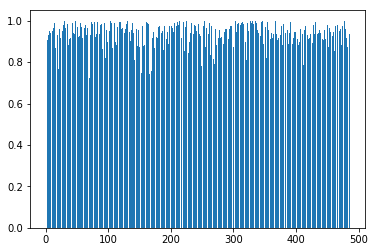

In [35]:
distance = []
for i in range(len(data)):
    distance.append(jaccard_dist(data.values[0,:], data.values[i,:]))
plt.bar(range(len(data)), distance)

**把每一个amt塞到横轴为用户，纵轴为商品的大表格里面**

In [11]:
data1 = DataFrame(0, columns=pluno_series1, index=vipno_series)
# print(data)
for i in df1.index:
    vipno = df1['vipno'][i]
    pluno = df1['pluno'][i]
    amt = group_data1[vipno][pluno]
    if math.isnan(data1[pluno][vipno]):
        data1[pluno][vipno] = amt
    else:
        data1[pluno][vipno] += amt
data2 = DataFrame(0, columns=pluno_series2, index=vipno_series)
# print(data)
for i in df2.index:
    vipno = df2['vipno'][i]
    pluno = df2['pluno'][i]
    amt = group_data2[vipno][pluno]
    if math.isnan(data2[pluno][vipno]):
        data2[pluno][vipno] = amt
    else:
        data2[pluno][vipno] += amt
data3 = DataFrame(0, columns=pluno_series3, index=vipno_series)
# print(data)
for i in df1.index:
    vipno = df3['vipno'][i]
    pluno = df3['pluno'][i]
    amt = group_data3[vipno][pluno]
    if math.isnan(data3[pluno][vipno]):
        data3[pluno][vipno] = amt
    else:
        data3[pluno][vipno] += amt
data4 = DataFrame(0, columns=pluno_series4, index=vipno_series)
# print(data)
for i in df4.index:
    vipno = df4['vipno'][i]
    pluno = df4['pluno'][i]
    amt = group_data4[vipno][pluno]
    if math.isnan(data4[pluno][vipno]):
        data4[pluno][vipno] = amt
    else:
        data4[pluno][vipno] += amt

In [12]:
data = pd.concat([data1, data2, data3, data4],axis=1)
print(data)

pluno                10     11     14     15     20     21     22     23     \
vipno                                                                         
781924                  24    504    378   1057      0      0      0     18   
13325038116           7632      0      5    784      0      0     54    250   
13854627199              0      0   2090      0      0      0   5488     84   
13864739266             19      0   2226    672      0      0     15      6   
15954611837              0      0    424      0    125      0    132      0   
15954688237             11     38      8   1729      0    505    605    695   
15963883482           1377      0   3906   1380      0      0    156      0   
15963885355              0      0     52    495      0     78   1155    124   
18554652702              8     26   2156    288      0      0    216     18   
18654692914              0      0   1027    414      0      0   3451     66   
18764569988              0     30      0      0     

In [13]:
#记录：用户486个，plu一级18个，plu二级94个，plu三级329个，plu四级979个
data.values[1,0:18]

array([7632,    0,    5,  784,    0,    0,   54,  250,   12,    0,   56,
          0,    0,    0,    0,    0,    0,    0], dtype=int64)

**下面是K-Means算法，由于距离计算函数不是欧式距离，所以要自己改成jaccard距离**

In [21]:
def initCentroids(dataSet, k):#dataSet-数据点数组 k-设置的质心数
    #初始化质心 
    numSamples, dim = dataSet.shape#numSample-数据点个数 dim-数据点维数 
    #shape返回一个关于数组长宽的数组
    centroids = np.zeros((k, dim))#centroids-存放质心的数组
    index = random.sample(range(0, numSamples), k)#index-在零到数据点个数间的随机数
    print(index)
    for i in range(len(index)):
        centroids[i, :] = dataSet.values[index[i], :]
    #将随机质心存储入centroids
    return centroids

In [15]:
def CP(label, k, centroids, dataSet):
    cpnum = 0
    for i in range(k):
        distance = 0
        num = 0
        for j in range((len(label))):
            if label[j] == i:
                distance += jaccard_dist(dataSet.values[j,:],centroids[i,:])
                num += 1
        cpnum += distance/num
    return cpnum/k

In [16]:
def getCentroid(dataSet):
    div = len(dataSet)
    return sum(dataSet)/div

In [26]:
def getSC(dataSet, label):
    sum_number = 0
    k = len(label)
    for i in range(k):
        ai = 0
        bi = 0
        anum = 0
        bnum = 0
        for j in range(k):
            if label[i]==label[j]:
                ai += jaccard_dist(dataSet.values[i,:],dataSet.values[j,:])
                anum += 1
            else:
                bi += jaccard_dist(dataSet.values[i,:],dataSet.values[j,:])
                bnum += 1
        ai = ai / anum
        bi = bi / bnum
        sum_number += (bi - ai) / max(ai, bi)     
    return sum_number / k

In [18]:
def kmeans(dataSet, k):
    #k-means算法的核心函数
    numSamples = dataSet.shape[0]#数据点个数为数据点数组的行数
    label=np.zeros(dataSet.shape[0])
    clusterChanged = True#clusterChanged-表示是否需要重新分组的布尔值判定量
    
    centroids = initCentroids(dataSet, k)#初始化质心
    
    while clusterChanged:#需要重新分组时
        clusterChanged = False#重置判定量为假
        for i in range(numSamples):#遍历所有数据点
            minDist = 100000.0#minDist-最小的数据点与质心的距离
            minIndex = 0#minIndex-最小的链接地址
            for j in range(k):
                #计算每个数据点到哪个质心的距离最小，及记录是哪一个质心
                distance = jaccard_dist(centroids[j, :], dataSet.values[i, :])#distance-暂时存放数据点到质心的距离，这里是jaccard距离
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            if label[i] != minIndex:#当该数据点所隶属的质心与最小链接地址不同时更新点中的数据
                clusterChanged = True#重置判定量为真
                label[i] = minIndex#该数据点的第二列变为一个数组
        for j in range(k):#由新的隶属关系中更新质心位置
            pointsInCluster = []
            for m in range(len(label)):
                if label[m]==j:
                    pointsInCluster.append(dataSet.values[m, :])
            centroids[j, :] = getCentroid(pointsInCluster)
        print(label)
    print("分类完成")
    #这里计算SC
    silhouette_score = getSC(data, label)
    #这里计算CP
    compactness_score = CP(label,k,centroids,dataSet)
    print("sc:" + str(silhouette_score))
    print("cp:" + str(compactness_score))
    return silhouette_score,compactness_score

In [27]:
silhouette_score_array = []
for i in range(2,40):#从K为2到K为39，尝试一下
    silhouette_score_array.append(kmeans(data, i))

[154, 331]
[1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 

KeyboardInterrupt: 

In [28]:
print(silhouette_score_array)

[(0.046009060242664455, 0.8703314634660553), (0.04639800140986168, 0.8507745782471007), (0.05223778588281045, 0.8456376368168257), (0.0566935590430981, 0.8431493097538644), (0.06192274837863743, 0.8381479902059875), (0.07376180474905145, 0.8213263839704223), (0.07619498835114803, 0.8275969889541755), (0.08196899003053335, 0.8183985455356022), (0.08084097548653246, 0.8227424299647964), (0.08860153147888537, 0.823448835207196), (0.09692827131098074, 0.8059556649567884), (0.10340349963964743, 0.804504663043267), (0.10734198666238734, 0.795502089742313), (0.10567994045519696, 0.8000799221307303), (0.11088282728752352, 0.7987122184817311), (0.11648661299222518, 0.7925162285447176), (0.12333206200997812, 0.7843122079991169), (0.12441300679296502, 0.7877305175020182), (0.13252647848121082, 0.7833612522715192), (0.13229130338814887, 0.7103942757034106), (0.13677147198394154, 0.7354396374295498), (0.13937959430553268, 0.7729682405904812), (0.14715264498363456, 0.7618160925415621), (0.1474928992

In [30]:
scdf = DataFrame(silhouette_score_array,index=range(2,40))
scdf

,0,1
2,0.046009,0.870331
3,0.046398,0.850775
4,0.052238,0.845638
5,0.056694,0.843149
6,0.061923,0.838148
7,0.073762,0.821326
8,0.076195,0.827597
9,0.081969,0.818399
10,0.080841,0.822742
11,0.088602,0.823449


SC指数变化趋势


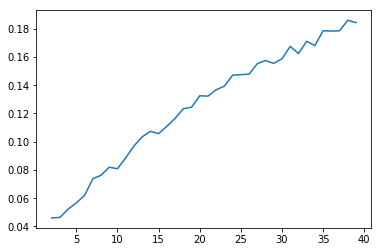

In [31]:
print("SC指数变化趋势")
plt.plot(scdf[0])

CP指数变化趋势


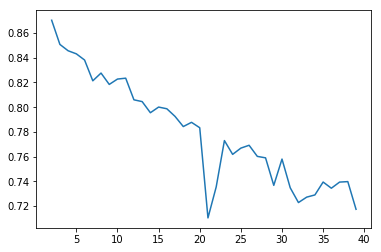

In [32]:
print("CP指数变化趋势")
plt.plot(scdf[1])

In [33]:
test_sc_cp = kmeans(data, 200)

[405, 251, 104, 231, 421, 362, 278, 242, 209, 182, 318, 439, 122, 304, 256, 357, 265, 468, 374, 223, 331, 190, 77, 84, 388, 33, 160, 350, 342, 144, 116, 438, 257, 259, 275, 415, 320, 428, 446, 210, 12, 28, 37, 300, 184, 404, 80, 437, 252, 108, 201, 469, 74, 260, 139, 71, 21, 385, 132, 50, 422, 82, 451, 157, 51, 173, 133, 121, 96, 472, 312, 25, 430, 378, 192, 219, 10, 211, 418, 93, 367, 62, 370, 441, 448, 88, 214, 1, 205, 67, 112, 39, 206, 316, 361, 334, 155, 145, 81, 431, 293, 151, 237, 358, 311, 398, 208, 447, 109, 239, 61, 114, 343, 289, 92, 115, 368, 16, 101, 235, 48, 111, 309, 326, 384, 243, 482, 470, 124, 279, 409, 163, 120, 292, 412, 341, 452, 347, 41, 105, 262, 38, 63, 136, 73, 97, 126, 290, 57, 466, 140, 288, 355, 283, 371, 198, 85, 156, 20, 351, 102, 24, 70, 383, 229, 207, 68, 407, 13, 46, 330, 478, 150, 15, 202, 9, 273, 5, 363, 453, 436, 191, 460, 483, 47, 401, 323, 366, 359, 89, 403, 476, 159, 217, 381, 269, 66, 474, 317, 119]
[162.  87. 193.  71. 174. 177. 158.   3.  16. 17

In [34]:
test_sc_cp = kmeans(data, 300)

[307, 275, 209, 258, 4, 187, 284, 352, 311, 285, 201, 214, 472, 78, 206, 436, 179, 312, 40, 139, 295, 406, 191, 184, 35, 385, 62, 309, 383, 222, 400, 54, 281, 72, 171, 413, 476, 83, 292, 207, 211, 456, 449, 136, 362, 175, 388, 344, 41, 231, 429, 358, 350, 464, 373, 338, 226, 124, 354, 6, 251, 360, 37, 266, 380, 326, 134, 262, 218, 156, 202, 76, 1, 221, 158, 98, 404, 34, 128, 434, 318, 50, 232, 23, 57, 389, 144, 286, 212, 31, 75, 370, 403, 182, 412, 26, 322, 405, 481, 166, 112, 361, 70, 205, 180, 118, 401, 93, 183, 28, 42, 288, 315, 366, 294, 48, 189, 52, 30, 230, 297, 51, 303, 172, 448, 480, 264, 375, 259, 163, 247, 257, 68, 323, 121, 287, 196, 33, 455, 13, 195, 320, 162, 253, 439, 45, 425, 310, 319, 240, 384, 219, 267, 135, 451, 462, 415, 164, 424, 290, 7, 356, 379, 420, 213, 457, 157, 129, 459, 170, 105, 120, 249, 355, 428, 235, 479, 97, 198, 99, 256, 335, 165, 47, 458, 193, 246, 254, 58, 276, 208, 25, 152, 410, 217, 155, 63, 482, 16, 333, 340, 283, 14, 483, 359, 265, 300, 427, 280, 